# imports

In [2]:
import csv
import os,re,csv
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from gensim import corpora, models
import gensim
import numpy as np
import scipy
import math
import matplotlib.pyplot as plt
import plotly.plotly as py
import twitter
import json
import pandas as pd

In [3]:
import tweepy
import csv
import json

# setting up the csv files

## Start (added by Natallia)

In [3]:
!pwd

/Users/Natallia/Documents/R/W210_capstone/Project/personality


In [5]:
#!ls -l

In [6]:
## CSV folder have all scv files starts with 'b...

#### Rename original files

In [108]:
os.chdir('/Users/Natallia/Documents/R/W210_capstone/Project/personality/CSV')
originals = []
for f in os.listdir():
    #print(f)
    originals.append(f)
originals[:4]
    

["b'E_N_F_J_Jun_6_30'.csv",
 "b'I_S_T_P_Jun_6_23'.csv",
 "b'E_N_T_P_Jun_6_15'.csv",
 "b'E_N_T_P_Jun_6_23'.csv"]

In [31]:
import os
os.chdir('/Users/Natallia/Documents/R/W210_capstone/Project/personality/CSV')
for f in os.listdir():
    file_n,file_ext = os.path.splitext(f)
    #print(file_n,file_ext)
    file_n = str(file_n.strip("b'"))
    new = '{}{}'.format(file_n,file_ext)
    os.rename(f,new)
    
    print(file_n,file_ext)
    

E_S_T_J_Jun_6_15 .csv
E_S_T_P_Jun_6_30 .csv
E_S_F_J_Jun_6_23 .csv
I_S_T_J_Jun_6_30 .csv
I_S_F_P_Jun_6_23 .csv
I_S_T_P_Jun_6_15 .csv
E_S_F_J_Jun_6_30 .csv
E_S_T_P_Jun_6_23 .csv
E_S_F_P_Jun_6_15 .csv
I_S_F_J_Jun_6_15 .csv
I_S_F_P_Jun_6_30 .csv
I_S_T_J_Jun_6_23 .csv
I_N_T_P_Jun_6_23 .csv
I_N_F_J_Jun_6_30 .csv
I_N_F_P_Jun_6_15 .csv
E_N_F_J_Jun_6_15 .csv
E_N_T_J_Jun_6_23 .csv
E_N_F_P_Jun_6_30 .csv
i_n_t_j_Jun_6_15 .csv
I_N_F_J_Jun_6_23 .csv
I_N_T_P_Jun_6_30 .csv
E_N_F_P_Jun_6_23 .csv
E_N_T_J_Jun_6_30 .csv
E_N_T_P_Jun_6_15 .csv
E_N_F_J_Jun_6_23 .csv
E_N_T_P_Jun_6_30 .csv
E_N_T_J_Jun_6_15 .csv
I_N_T_P_Jun_6_15 .csv
I_N_F_P_Jun_6_23 .csv
I_N_T_J_Jun_6_30 .csv
E_N_F_P_Jun_6_15 .csv
E_N_T_P_Jun_6_23 .csv
E_N_F_J_Jun_6_30 .csv
I_N_T_J_Jun_6_23 .csv
I_N_F_P_Jun_6_30 .csv
I_N_F_J_Jun_6_15 .csv
I_S_F_P_Jun_6_15 .csv
I_S_F_J_Jun_6_30 .csv
I_S_T_P_Jun_6_23 .csv
E_S_F_P_Jun_6_30 .csv
E_S_T_J_Jun_6_23 .csv
E_S_F_J_Jun_6_15 .csv
I_S_T_P_Jun_6_30 .csv
I_S_F_J_Jun_6_23 .csv
I_S_T_J_Jun_6_15 .csv
E_S_T_P_Ju

http://jonathansoma.com/lede/foundations-2017/classes/working-with-many-files/class/

In [32]:
import glob

# The * is not a regex, it just means "match anything"
# This matches datafile-0.csv, datafile-1.csv, etc.
glob.glob("*_*.csv")

['E_S_T_J_Jun_6_15.csv',
 'E_S_T_P_Jun_6_30.csv',
 'E_S_F_J_Jun_6_23.csv',
 'I_S_T_J_Jun_6_30.csv',
 'I_S_F_P_Jun_6_23.csv',
 'I_S_T_P_Jun_6_15.csv',
 'E_S_F_J_Jun_6_30.csv',
 'E_S_T_P_Jun_6_23.csv',
 'E_S_F_P_Jun_6_15.csv',
 'I_S_F_J_Jun_6_15.csv',
 'I_S_F_P_Jun_6_30.csv',
 'I_S_T_J_Jun_6_23.csv',
 'I_N_T_P_Jun_6_23.csv',
 'I_N_F_J_Jun_6_30.csv',
 'I_N_F_P_Jun_6_15.csv',
 'E_N_F_J_Jun_6_15.csv',
 'E_N_T_J_Jun_6_23.csv',
 'E_N_F_P_Jun_6_30.csv',
 'i_n_t_j_Jun_6_15.csv',
 'I_N_F_J_Jun_6_23.csv',
 'I_N_T_P_Jun_6_30.csv',
 'E_N_F_P_Jun_6_23.csv',
 'E_N_T_J_Jun_6_30.csv',
 'E_N_T_P_Jun_6_15.csv',
 'E_N_F_J_Jun_6_23.csv',
 'E_N_T_P_Jun_6_30.csv',
 'E_N_T_J_Jun_6_15.csv',
 'I_N_T_P_Jun_6_15.csv',
 'I_N_F_P_Jun_6_23.csv',
 'I_N_T_J_Jun_6_30.csv',
 'E_N_F_P_Jun_6_15.csv',
 'E_N_T_P_Jun_6_23.csv',
 'E_N_F_J_Jun_6_30.csv',
 'I_N_T_J_Jun_6_23.csv',
 'I_N_F_P_Jun_6_30.csv',
 'I_N_F_J_Jun_6_15.csv',
 'I_S_F_P_Jun_6_15.csv',
 'I_S_F_J_Jun_6_30.csv',
 'I_S_T_P_Jun_6_23.csv',
 'E_S_F_P_Jun_6_30.csv',


In [4]:
## add more time frames//
time_frames = ['Jun_6_15','Jun_6_23','Jun_6_30']

In [5]:
p_types = 'ISTJ,ISFJ,INFJ,INTJ,ISTP,ISFP,INFP,INTP,ESTP,ESFP,ENFP,ENTP,ESTJ,ESFJ,ENFJ,ENTJ'
## transformed into python list
p_list = p_types.split(',', 16)
#len(p_list)
#p_list



### create a list of file names that include personality type + time frame



In [6]:
file_names = []
for tf in time_frames:
    for pt in p_list:
        file_names.append('_'.join(pt)+'_'+ tf + '.csv')
    

In [7]:
file_names[:3]

['I_S_T_J_Jun_6_15.csv', 'I_S_F_J_Jun_6_15.csv', 'I_N_F_J_Jun_6_15.csv']

### Create list of dataframes for processing

In [8]:
list_of_dfs = [pd.read_csv(fn,\
            dtype={'tweet_text': str,'username':str,'followers_count': int}) for fn in file_names]



In [9]:
list_of_dfs[0]

,timestamp,tweet_text,username,image,followers_count
0,2019-06-15 23:44:16,"b""Just wanna share that i am an ISTJ short for...",b'luripilsin',http://pbs.twimg.com/profile_images/1131020082...,937


#### assign the last  column to be file name 

In [10]:
for dataframe, filename in zip(list_of_dfs, file_names):
    dataframe['filename'] = filename

In [11]:
list_of_dfs[-1]

,timestamp,tweet_text,username,image,followers_count,filename
0,2019-06-25 23:53:39,b'@EdLatimore My late mother was an ENTJ. I am...,b'RassGlass',http://pbs.twimg.com/profile_images/1124621789...,111,E_N_T_J_Jun_6_30.csv
1,2019-06-25 18:08:22,b'@EdLatimore I am an ENTJ and fit the descrip...,b'J_Immormino',http://pbs.twimg.com/profile_images/1131228408...,111,E_N_T_J_Jun_6_30.csv
2,2019-06-21 15:11:05,b'@tipsymerlot Yes! I am an entj \xf0\x9f\x92\...,b'blaxmatcha',http://pbs.twimg.com/profile_images/1145276678...,2963,E_N_T_J_Jun_6_30.csv


### concatenate all df

In [12]:
df_NS = pd.concat(list_of_dfs, ignore_index=True)
df_NS.head(2)

,timestamp,tweet_text,username,image,followers_count,filename
0,2019-06-15 23:44:16,"b""Just wanna share that i am an ISTJ short for...",b'luripilsin',http://pbs.twimg.com/profile_images/1131020082...,937,I_S_T_J_Jun_6_15.csv
1,2019-06-14 21:34:45,"b""I don't understand... i'm so fucking lost, w...",b'heiseinbitch',http://pbs.twimg.com/profile_images/1097456689...,233,I_N_F_J_Jun_6_15.csv


In [13]:
df_NS['Personality'] = df_NS['filename'].apply(lambda x: x[:7][::2].lower())

In [14]:
df = df_NS.drop(['timestamp','tweet_text','filename'],axis=1)

In [15]:
df.tail()

,username,image,followers_count,Personality
170,b'readwithanna',http://pbs.twimg.com/profile_images/1118231210...,18,enfj
171,b'meliekfilms',http://pbs.twimg.com/profile_images/9394471442...,72,enfj
172,b'RassGlass',http://pbs.twimg.com/profile_images/1124621789...,111,entj
173,b'J_Immormino',http://pbs.twimg.com/profile_images/1131228408...,111,entj
174,b'blaxmatcha',http://pbs.twimg.com/profile_images/1145276678...,2963,entj


In [16]:
df.dtypes

username           object
image              object
followers_count     int64
Personality        object
dtype: object

In [17]:
df.shape

(175, 4)

## End (added by Natallia)

In [18]:
df['Personality'].unique()

array(['istj', 'infj', 'intj', 'istp', 'isfp', 'infp', 'intp', 'enfp',
       'entp', 'enfj', 'entj', 'isfj', 'estj'], dtype=object)

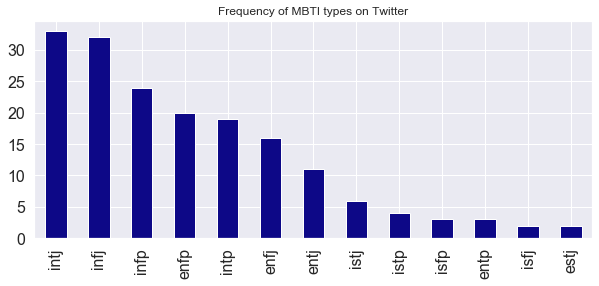

In [19]:
import seaborn as sns
sns.set()
df['Personality'].value_counts().plot(kind='bar',\
                colormap = 'plasma',figsize = (10,4),fontsize = 16,\
                title = 'Frequency of MBTI types on Twitter')

### set up the columns for the final dataframe

In [20]:
header_list = ['Personality', 'username', 'user_id', 'tweets', 'followers_count','image']
df = df.reindex(columns = header_list)
df.head()

,Personality,username,user_id,tweets,followers_count,image
0,istj,b'luripilsin',NaN,NaN,937,http://pbs.twimg.com/profile_images/1131020082...
1,infj,b'heiseinbitch',NaN,NaN,233,http://pbs.twimg.com/profile_images/1097456689...
2,infj,b'madihamberger',NaN,NaN,526,http://pbs.twimg.com/profile_images/1134280248...
3,infj,b'a_rdirivera',NaN,NaN,4024,http://pbs.twimg.com/profile_images/1138091420...
4,infj,b'a_rdirivera',NaN,NaN,4024,http://pbs.twimg.com/profile_images/1138091420...


# set up the tweepy credentials to access data from twitter

In [21]:
import json

# create a dictionary to store your twitter credentials

twitter_cred = dict()


twitter_cred['CONSUMER_KEY'] = 'FYkqgdipLO6z3Cypq9df7u5Sl'
twitter_cred['CONSUMER_SECRET'] = 'JJdJ7Ae4x5WI9VRMyCkcPVZO14eHaMZJjzFXSpO6WkPKB150oO'
twitter_cred['ACCESS_KEY'] = '1141049557322592256-zBZj5YJssmyl60B6jXpdCP5qbMZpIZ'
twitter_cred['ACCESS_SECRET'] = 'q7EjUt7RJjQaCXXObSXON6gyIDDfwPsbeBbGE74hC9Paw'

with open('twitter_credentials1.json', 'w') as secret_info:
    json.dump(twitter_cred, secret_info, indent=4, sort_keys=True)
#Your saved json will look like the one shown below. It will be saved in the current directory under the name twitter_credentials.json.


In [22]:
api = twitter.Api(consumer_key='FYkqgdipLO6z3Cypq9df7u5Sl',
                      consumer_secret='JJdJ7Ae4x5WI9VRMyCkcPVZO14eHaMZJjzFXSpO6WkPKB150oO',
                      access_token_key='1141049557322592256-zBZj5YJssmyl60B6jXpdCP5qbMZpIZ',
                      access_token_secret='q7EjUt7RJjQaCXXObSXON6gyIDDfwPsbeBbGE74hC9Paw')

In [23]:
auth = tweepy.OAuthHandler(twitter_cred['CONSUMER_KEY'], twitter_cred['CONSUMER_SECRET'])
auth.set_access_token(twitter_cred['ACCESS_KEY'], twitter_cred['ACCESS_SECRET'])
api = tweepy.API(auth)

### Added by Natallia

In [24]:
#### try this next time - it might allow more tweets per session:
#uncomment below to run:
api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)
  

# fix up the username column

In [26]:
print(type(df['username']))

usernames = list(df['username'])

#there are two problems here--we have the extra set of quotes and the b in front

for i in range(len(usernames)):
    usernames[i] = usernames[i][1:]
    usernames[i] = usernames[i].replace('\'', '')

#print(usernames)

<class 'pandas.core.series.Series'>


We see that the usernames each have a b in front, so we need to remove the first character of each string, and also the extra set of quotes. We need to remove these in order to pass the username to the other twitter functions.

In [27]:
print(usernames[2])

#get_user_text(df['username'][2])

print(usernames[2]== 'madihamberger')
print(usernames[2]== "'madihamberger'")

s = usernames[2][1: ]
s = usernames[2].replace('\'', '')


print(s == 'madihamberger')
print(s == "'madihamberger'")


madihamberger
True
False
True
False


In [28]:
api.get_user(screen_name = s).id

44798649

In [29]:
#create a list of user_ids
user_id = []
i = 0

for item in usernames:
    try:
        user_id.append(api.get_user(screen_name = item).id)
    except:
        i = i + 1
        print(item)
        print("badvalue")
        user_id.append("NA")

print(i)


parkjiminfocus
badvalue
c11192019
badvalue
wasdgamerguy
badvalue
wasdgamerguy
badvalue
19XXBeantown
badvalue
5


In [30]:
print(user_id[:4])

[725812023989129216, 337081254, 44798649, 2182094762]


### why are there still some bad values?

In [31]:
df['username'] = usernames

In [32]:
df['user_id'] = user_id

In [33]:
df.head()

,Personality,username,user_id,tweets,followers_count,image
0,istj,luripilsin,725812023989129216,NaN,937,http://pbs.twimg.com/profile_images/1131020082...
1,infj,heiseinbitch,337081254,NaN,233,http://pbs.twimg.com/profile_images/1097456689...
2,infj,madihamberger,44798649,NaN,526,http://pbs.twimg.com/profile_images/1134280248...
3,infj,a_rdirivera,2182094762,NaN,4024,http://pbs.twimg.com/profile_images/1138091420...
4,infj,a_rdirivera,2182094762,NaN,4024,http://pbs.twimg.com/profile_images/1138091420...


In [34]:
df.shape

(175, 6)

# now lets work on the tweet text column

In [37]:
twitter_cred['CONSUMER_KEY'] = 'FYkqgdipLO6z3Cypq9df7u5Sl'
twitter_cred['CONSUMER_SECRET'] = 'JJdJ7Ae4x5WI9VRMyCkcPVZO14eHaMZJjzFXSpO6WkPKB150oO'
twitter_cred['ACCESS_KEY'] = '1141049557322592256-zBZj5YJssmyl60B6jXpdCP5qbMZpIZ'
twitter_cred['ACCESS_SECRET'] = 'q7EjUt7RJjQaCXXObSXON6gyIDDfwPsbeBbGE74hC9Paw'

### NS: function below is modified to allow more users tweets collection

In [68]:
def get_all_tweets(screen_name):
#Twitter only allows access to a users most recent 3240 tweets with this method

    consumer_key = twitter_cred['CONSUMER_KEY']
    consumer_secret = twitter_cred['CONSUMER_SECRET']
    access_token = twitter_cred['ACCESS_KEY']
    access_token_secret = twitter_cred['ACCESS_SECRET']

    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    auth.secure = True
    #api = tweepy.API(auth)
    ## use "wait_on_rate =True" to process over 50 users with extended loop
    ## the execution will be delayed for 8-10 min, the API simply pause, but then
    ## the tweet collection will resume (do not turn off computer pr NB!)
    api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)
  
    
#initialize a list to hold all the tweepy Tweets
    alltweets = []

#make initial request for most recent tweets (200 is the maximum allowed count)
    new_tweets = api.user_timeline(screen_name = screen_name, count=200, include_rts=False, tweet_mode = 'extended')

#save most recent tweets
    alltweets.extend(new_tweets)

#save the id of the oldest tweet less one
    oldest = alltweets[-1].id - 1

#keep grabbing tweets until there are no tweets left to grab
    while len(new_tweets) > 0:
        #print("collecting tweets before %s" % (oldest))

    #all subsiquent requests use the max_id param to prevent duplicates
        new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest,tweet_mode = 'extended')

    #save most recent tweets
        alltweets.extend(new_tweets)

    #update the id of the oldest tweet less one
        oldest = alltweets[-1].id - 1

        #print("...%s tweets downloaded so far" % (len(alltweets)))
        #print("##############################################################")
        #uncomment  below if want the tweets printout
        #print(alltweets[0])

#transform the tweepy tweets into a 2D array that will populate the csv

    outtweets = []
    for tweet in alltweets:
        ## added the language requirement
        if(len(tweet.full_text)>0) and tweet.lang == "en":
            outtweets.append(tweet.full_text)
        else:
            outtweets.append('')
    user_text = []
    ## use " outtweets[:200]" below to only pull 200 tweets per user
    for item in outtweets[:200]:
        if item.startswith("RT"):
            continue
        #take out URLS
        replaced = re.sub('http\S+','', item)
        #replace all user tages with generic @user
        replaced = re.sub('@\S+','@user', replaced)
        replaced = re.sub('\"\S+\"','',replaced)
        user_text.append(replaced)

    return(user_text)

### Regular loop (process up to 50 usernames)
 -  do not run code below if you have ## over 50 ## usernames in the df

In [ ]:
tweet_text = []
i = 0

for i in range(len(usernames)):
    try:
        tweet_text.append(get_all_tweets(usernames[i]))
    except:
        i = i + 1
        tweet_text.append('NA')
    print(i)
    print(tweet_text[i][0])

In [89]:
print(usernames)

['luripilsin', 'heiseinbitch', 'madihamberger', 'a_rdirivera', 'a_rdirivera', 'ladykrisffer', 'onthewaybg', 'patchworkcc2015', 'JanAryannn', 'laura_la_plante', 'harmonicait', 'Soulonajourney1', 'Colleen_Kellogg', 'S7r94', 'CRHarrisWrites', 'nikaizd', 'joemillerwired', 'stephcode', 'JohnBauters', 'TIL_ayg', 'ActionBearson', 'kathryn222882', 'kuehlapis12', 'apbeaton', 'TIL_ayg', 'TIL_ayg', '3amsoda', 'brokeneisenglas', 'rapartin93', 'amykrzyzaniak1', 'pagesandpanels', 'mb_times', 'AlphritaSims', 'ayakanesmoon', 'TheINFP_Bear', 'JordanMarisa11', 'AlexS_Writes', 'airublu', 'imnotasweetie', 'gukmulie', 'xernue', 'BruceSutherlan4', 'nerd_backpack', 'parkjiminfocus', 'namgiaesthetics', 'xasoiaf', 'dylanw', 'c11192019', 'Juliamagdazrc', 'Wanderingc0rpse', 'ukthxbyek', '2dancingpandas', 'DotsWritingDojo', 'SerinaMartinez', 'SandraSchehl', 'IAmCloutier', 'DamnSheElite', 'techmariah', 'pr3achlikeagirl', 'ChurchTherapist', 'camperry21', 'galaxiaskykloz', 'sarahyoung_esq', 'filmandtheatre', 'Meghan

In [44]:
len(usernames)

175

### Extended loop:
 - This is how to collect tweets (200 per user) for more than 50 users.
     -  divide users into equal in size batches, for example , 175 users will be processed with 3 batches (50*3) plus other 25 users could be process as "regular loop"
     - also can divide 175 into 7 batches each 25 and use extended loop below
     

In [106]:
### Here is how extended loop is done:
u1 = usernames[0:1*batch]
print('first user for batch 1:',u1[0])
print('LAST user for batch 1:',u1[-1])
print('######')
u2 = usernames[1*batch:2*batch]
print('first user for batch 2:',u2[0])
print('first user for batch 2:',u2[-1])

print('######')

u3 = usernames[2*batch:3*batch]
print('first user for batch 3:',u3[0])
print('LAST user for batch 3:',u2[-1])

print('######')


u4 = usernames[3*batch:N]


print('first user for batch 4(not complete):',u4[0])
print('LAST user for batch 4:',u4[-1])

print('first user all usernames list:',usernames[0])

print('LAST user all usernames list:',usernames[-1])

print('full list length', len(u1+u2+u3+u4))

first user for batch 1: luripilsin
LAST user for batch 1: Wanderingc0rpse
######
first user for batch 2: ukthxbyek
first user for batch 2: SchoolArcane
######
first user for batch 3: manda_michele88
LAST user for batch 3: SchoolArcane
######
first user for batch 4(not complete): linsequoiaa
LAST user for batch 4: blaxmatcha
first user all usernames list: luripilsin
LAST user all usernames list: blaxmatcha
full list length 175


### Collecting tweets from 150 users at once.

In [67]:

tweet_text = []
N = len(usernames)
batch = 50
num_batch = int(df.shape[0]/batch)
#print(num_batch)
N - num_batch*batch
for m in range(num_batch):
    tw = []
    u_names = usernames[m*batch:(m+1)*batch]
    
    
    i = 0

    for i in range(len(u_names)):
        try:
            tw.append(get_all_tweets(u_names[i]))
        except:
            #i = i + 1
            tw.append('NA')
        print(i)
        print('collected:',len(tw[i]),'\n')
    print('m=',m)
    tweet_text = tweet_text + tw

    

0
collected: 200 

1
collected: 199 

2
collected: 165 

3
collected: 189 

4
collected: 189 

5
collected: 200 

6
collected: 92 

7
collected: 134 

8
collected: 200 

9
collected: 170 

10
collected: 190 

11
collected: 78 

12
collected: 200 

13
collected: 194 

14
collected: 200 

15
collected: 171 

16
collected: 198 

17
collected: 175 

18
collected: 200 

19
collected: 200 

20
collected: 162 

21
collected: 44 

22
collected: 199 

23
collected: 200 

24
collected: 200 

25
collected: 200 

26
collected: 196 

27
collected: 175 

28
collected: 200 

29
collected: 174 

30
collected: 198 

31
collected: 200 

32
collected: 200 

33
collected: 165 

34
collected: 199 

35
collected: 189 

36
collected: 200 

37
collected: 140 

38
collected: 120 

39
collected: 2 

40
collected: 196 

41
collected: 143 

42
collected: 200 

43
collected: 2 

44
collected: 192 

45
collected: 113 

46
collected: 199 

47
collected: 2 

48
collected: 143 

49
collected: 182 

m= 0
0
collected: 1

Rate limit reached. Sleeping for: 520


19
collected: 200 

20
collected: 200 

21
collected: 129 

22
collected: 174 

23
collected: 188 

24
collected: 194 

25
collected: 200 

26
collected: 188 

27
collected: 188 

28
collected: 152 

29
collected: 199 

30
collected: 189 

31
collected: 189 

32
collected: 198 

33
collected: 200 

34
collected: 2 

35
collected: 199 

36
collected: 198 

37
collected: 197 

38
collected: 186 

39
collected: 197 

40
collected: 200 

41
collected: 200 

42
collected: 200 

43
collected: 2 

44
collected: 194 

45
collected: 157 

46
collected: 197 

47
collected: 194 

48
collected: 196 

49
collected: 159 

m= 1
0
collected: 197 

1
collected: 198 

2
collected: 200 

3
collected: 198 

4
collected: 196 

5
collected: 155 

6
collected: 120 

7
collected: 182 

8
collected: 200 

9
collected: 199 

10
collected: 198 

11
collected: 200 

12
collected: 155 

13
collected: 165 

14
collected: 102 

15
collected: 196 

16
collected: 200 

17
collected: 196 

18
collected: 193 

19
collec

Rate limit reached. Sleeping for: 499


33
collected: 179 

34
collected: 6 

35
collected: 138 

36
collected: 129 

37
collected: 192 

38
collected: 169 

39
collected: 197 

40
collected: 182 

41
collected: 198 

42
collected: 200 

43
collected: 2 

44
collected: 197 

45
collected: 200 

46
collected: 50 

47
collected: 200 

48
collected: 196 

49
collected: 196 

m= 2


### Here what it means "Rate limit reached. Sleeping for: 520"
https://blog.twitter.com/en_us/a/2008/what-does-rate-limit-exceeded-mean-updated.html

In [84]:
import time
from tqdm import tqdm 

In [85]:
### Check how many users's tweets were collected with extended loop
len(tweet_text)

175

In [81]:
u_4 = usernames[3*batch:N]
len(u_4)

25

In [83]:

i = 0

for i in range(len(u_4)):
    
    try:
        tweet_text.append(get_all_tweets(u_4[i]))
    except:
        #i = i + 1
        tweet_text.append('NA')
    print('user#',i)
    print('collected:',len(tweet_text[i]), 'tweets')



user# 0
collected: 200 tweets
user# 1
collected: 199 tweets
user# 2
collected: 165 tweets
user# 3
collected: 189 tweets
user# 4
collected: 189 tweets
user# 5
collected: 200 tweets
user# 6
collected: 92 tweets
user# 7
collected: 134 tweets
user# 8
collected: 200 tweets
user# 9
collected: 170 tweets
user# 10
collected: 190 tweets
user# 11
collected: 78 tweets
user# 12
collected: 200 tweets
user# 13
collected: 194 tweets
user# 14
collected: 200 tweets
user# 15
collected: 171 tweets
user# 16
collected: 198 tweets
user# 17
collected: 175 tweets
user# 18
collected: 200 tweets
user# 19
collected: 200 tweets
user# 20
collected: 162 tweets
user# 21
collected: 44 tweets
user# 22
collected: 199 tweets
user# 23
collected: 200 tweets
user# 24
collected: 200 tweets


In [86]:
len(tweet_text)

175

In [88]:
print(len(tweet_text))
print(len(usernames))

175
175


In [89]:
print(type(tweet_text))

<class 'list'>


In [91]:
df['tweets'] = tweet_text[0:175]

In [92]:
df.head()

,Personality,username,user_id,tweets,followers_count,image
0,istj,luripilsin,725812023989129216,"[, Of course, MOOD 😚\n\nI 💜 @user too , Litera...",937,http://pbs.twimg.com/profile_images/1131020082...
1,infj,heiseinbitch,337081254,[#nowwatching Stranger Things - Chapter One: S...,233,http://pbs.twimg.com/profile_images/1097456689...
2,infj,madihamberger,44798649,"[@user love you mom, @user &gt;:(\nI’m so sorr...",526,http://pbs.twimg.com/profile_images/1134280248...
3,infj,a_rdirivera,2182094762,"[, The night is still young , , , , , , , My s...",4024,http://pbs.twimg.com/profile_images/1138091420...
4,infj,a_rdirivera,2182094762,"[, The night is still young , , , , , , , My s...",4024,http://pbs.twimg.com/profile_images/1138091420...


# fix the image URLs

In [93]:
images = list(df['image'])
print(images[0:5])

['http://pbs.twimg.com/profile_images/1131020082102935552/ygGygumt_normal.jpg', 'http://pbs.twimg.com/profile_images/1097456689194942465/bIVc7V1P_normal.jpg', 'http://pbs.twimg.com/profile_images/1134280248709636096/XKnryDno_normal.jpg', 'http://pbs.twimg.com/profile_images/1138091420927946753/0oRjg8hC_normal.jpg', 'http://pbs.twimg.com/profile_images/1138091420927946753/0oRjg8hC_normal.jpg']


In [94]:
print(type(images[0]))

<class 'str'>


In [95]:
print(images[0])
images[0] = images[0].replace('_normal', '')
print(images[0])
                        

http://pbs.twimg.com/profile_images/1131020082102935552/ygGygumt_normal.jpg
http://pbs.twimg.com/profile_images/1131020082102935552/ygGygumt.jpg


In [96]:
for i in range(len(images)):
    images[i] = images[i].replace('_normal', '')

In [97]:
print(images[0:5])

['http://pbs.twimg.com/profile_images/1131020082102935552/ygGygumt.jpg', 'http://pbs.twimg.com/profile_images/1097456689194942465/bIVc7V1P.jpg', 'http://pbs.twimg.com/profile_images/1134280248709636096/XKnryDno.jpg', 'http://pbs.twimg.com/profile_images/1138091420927946753/0oRjg8hC.jpg', 'http://pbs.twimg.com/profile_images/1138091420927946753/0oRjg8hC.jpg']


In [98]:
df['image'] = images


In [99]:
df.head()

,Personality,username,user_id,tweets,followers_count,image
0,istj,luripilsin,725812023989129216,"[, Of course, MOOD 😚\n\nI 💜 @user too , Litera...",937,http://pbs.twimg.com/profile_images/1131020082...
1,infj,heiseinbitch,337081254,[#nowwatching Stranger Things - Chapter One: S...,233,http://pbs.twimg.com/profile_images/1097456689...
2,infj,madihamberger,44798649,"[@user love you mom, @user &gt;:(\nI’m so sorr...",526,http://pbs.twimg.com/profile_images/1134280248...
3,infj,a_rdirivera,2182094762,"[, The night is still young , , , , , , , My s...",4024,http://pbs.twimg.com/profile_images/1138091420...
4,infj,a_rdirivera,2182094762,"[, The night is still young , , , , , , , My s...",4024,http://pbs.twimg.com/profile_images/1138091420...


In [101]:
df.shape

(175, 6)

In [110]:
print('number of tweets from first user :',len(df.iloc[0,3]))

number of tweets from first user : 200


# export to a CSV file

In [102]:
personalities_df = df.to_csv ('personalities_nS.csv', index = None, header=True)

In [103]:
!pwd


/Users/Natallia/Documents/R/W210_capstone/Project/personality
